<a href="https://colab.research.google.com/github/AnishaJain15/Projects/blob/main/Aerofit_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AEROFIT**

Aerofit is a leading brand in the field of fitness equipments. It provides a range of products including machines such as treadmills, exercise bikes, gym equipments, and fitness accessories to cater to the needs of all categories of people.

## Business Problem

Identify the characteristics of the target audience for each type of treadmill offered by the company to provide better recommendations to new customers. Investigate whether there are differences across the product with respect to customer characteristics.

### Structure and Characteristics of dataset

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
df = pd.read_csv('aerofit.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
#length of data

len(df)

180

In [ ]:
#checking shape of data

df.shape

(180, 9)

In [ ]:
#checking datatype for all attributes

df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
#describe function

np.round(df.describe(),2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00




1.   Mean age is 28.79 years and 75% of people in the dataset have age less than or equal to 33
2.   75% of people have <=16 years of education
3.   75% of people use treadmills <=4 times
4.   Standard deviation is the highest for Income and Miles which suggests outliers



## Checking for Null Values

---



In [ ]:
# checking null values for each column

df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No Null values in any column.

## Non-Graphical and Univariate Analysis

---



In [ ]:
#No. of unique values for each column

for i in df.columns:
  print (i,':', df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [ ]:
#Count of each Product

df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

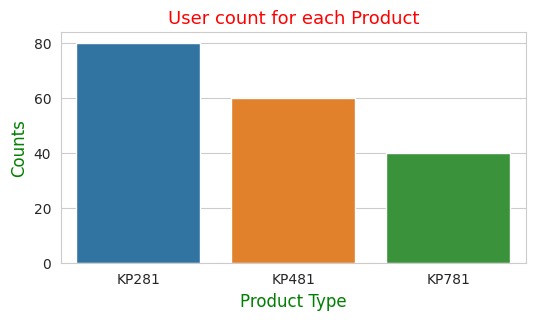

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, x="Product")
plt.xlabel('Product Type',  fontsize=12, color='green')
plt.ylabel('Counts', fontsize=12, color='green')
plt.title("User count for each Product", color='red', fontsize=13 )

plt.show()

We have data on three different types of Treadmills from Aerofit. Popuulation distribution is KP281(44.44%), KP481 (33.33%) and KP781 (22.22%). KP281 has maximum users.

In [ ]:
#Count of Males and Females for all models of treadmill

df_gender=df.groupby('Product')['Gender'].value_counts()
df_gender

Product  Gender
KP281    Female    40
         Male      40
KP481    Male      31
         Female    29
KP781    Male      33
         Female     7
Name: Gender, dtype: int64

Proportion of Males and females is almost same for KP481 and KP781. However, there is a huge difference in numbers for KP281. Males using KP281 are almost 5 times of females.

In [ ]:
#Count of weekly usage for all models of treadmill

df.groupby('Product')['Usage'].value_counts()

Product  Usage
KP281    3        37
         4        22
         2        19
         5         2
KP481    3        31
         2        14
         4        12
         5         3
KP781    4        18
         5        12
         6         7
         7         2
         3         1
Name: Usage, dtype: int64

KP281 and KP481 are both used by majority of people 3 times a week and both have maximum 5 times weekly usage.

While KP781 is used majorly 4 times per week with maximum count going up to 7. This is the only treadmill model that is used by people more than 5 times a week.

In [ ]:
#Count of Fitness ratings for all models of treadmill

df.groupby('Product')['Fitness'].value_counts()

Product  Fitness
KP281    3          54
         2          14
         4           9
         5           2
         1           1
KP481    3          39
         2          12
         4           8
         1           1
KP781    5          29
         4           7
         3           4
Name: Fitness, dtype: int64

Maximum people have rated themselves as 3 (average) on a scale of 1 to 5 for KP281 and KP481. The reason for average rating would be that the number of weekly usage is also lower for these models as compared to KP781 hence affecting the fitness level.

KP781, on other hand, has maximum rating as 5(excellent) with no person rating below 3(average). The ratings are directly related to more usage per week as seen earlier and hence increased fitness levels.

From this data, it can be inferred that people focusing more on fitness and health prefer using KP781 compared to the other two models.

In [ ]:
#Count of each age

df['Age'].value_counts().sort_values(ascending=False)

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
40     5
20     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [ ]:
#minimum age

df['Age'].min()

18

In [ ]:
#maximum age

df['Age'].max()

50

In [ ]:
#creating bins for age for better analysis

df['age_range'] = pd.cut(df['Age'], bins=[17, 21, 25, 29, 33, 37, 41, 45, 50],
                         labels=['18-21', '22-25', '26-29', '30-33', '34-37', '38-41', '42-45','46+'])

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_range
0,KP281,18,Male,14,Single,3,4,29562,112,18-21
1,KP281,19,Male,15,Single,2,3,31836,75,18-21
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-21
3,KP281,19,Male,12,Single,3,3,32973,85,18-21
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-21
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,38-41
176,KP781,42,Male,18,Single,5,4,89641,200,42-45
177,KP781,45,Male,16,Single,5,5,90886,160,42-45
178,KP781,47,Male,18,Partnered,4,5,104581,120,46+


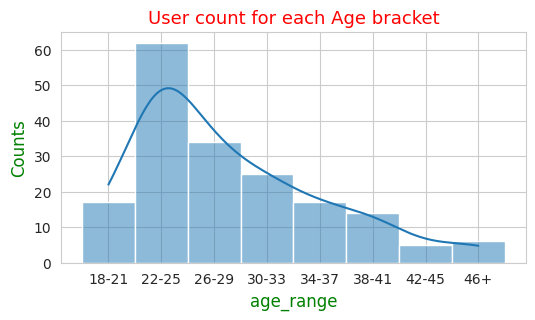

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x="age_range", kde=True)
plt.xlabel('age_range',  fontsize=12, color='green')
plt.ylabel('Counts', fontsize=12, color='green')
plt.title("User count for each Age bracket", color='red', fontsize=13 )

plt.show()

In [ ]:
df.groupby('Product')['age_range'].value_counts()

Product  age_range
KP281    22-25        24
         26-29        19
         18-21        10
         30-33         8
         34-37         7
         38-41         7
         46+           3
         42-45         2
KP481    22-25        21
         30-33        12
         34-37         8
         18-21         7
         26-29         5
         38-41         5
         42-45         1
         46+           1
KP781    22-25        17
         26-29        10
         30-33         5
         34-37         2
         38-41         2
         42-45         2
         46+           2
         18-21         0
Name: age_range, dtype: int64

Age varies from 18 to 50 years old. Most of the people are from 23-26(both inclusive).

For all three treadmills, 22-25 age group people are the top users (i.e. 33.33%). 42+ age group seems to be the lowest users for any type of treadmill.

For KP781, there is no user from 18-21 age group. Starting from age 22-25 as the top category, the number of users for the treadmill decrease with increase in age.

In [ ]:
#Count of each gender

df['Gender'].value_counts().sort_values(ascending=False)

Male      104
Female     76
Name: Gender, dtype: int64

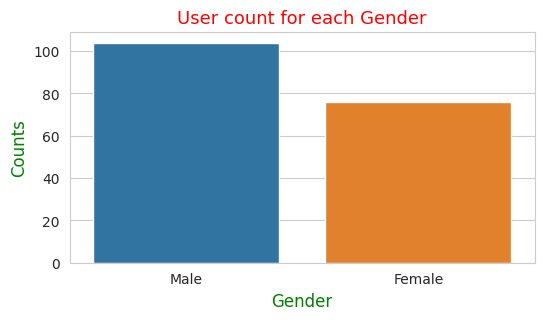

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, x="Gender")
plt.xlabel('Gender',  fontsize=12, color='green')
plt.ylabel('Counts', fontsize=12, color='green')
plt.title("User count for each Gender", color='red', fontsize=13 )

plt.show()

In [ ]:
#Counts of Age range as per Gender

df.groupby('Gender')['age_range'].value_counts()

Gender  age_range
Female  22-25        26
        26-29        16
        30-33        13
        34-37         8
        18-21         6
        38-41         4
        46+           2
        42-45         1
Male    22-25        36
        26-29        18
        30-33        12
        18-21        11
        38-41        10
        34-37         9
        42-45         4
        46+           4
Name: age_range, dtype: int64

Proportion of males is higher than females with 22-25 being the top age range for each gender.

57.77% of the population are Males.

In [ ]:
#Count of max age for each gender

df.groupby('Gender')['Age'].max()

Gender
Female    50
Male      48
Name: Age, dtype: int64

In [ ]:
#Count of minimum age for each gender

df.groupby('Gender')['Age'].min()

Gender
Female    19
Male      18
Name: Age, dtype: int64

In [ ]:
#Count of each product on the basis of gender

df.groupby('Gender')['Product'].value_counts()

Gender  Product
Female  KP281      40
        KP481      29
        KP781       7
Male    KP281      40
        KP781      33
        KP481      31
Name: Product, dtype: int64

Both Males and Females mostly prefer KP281. Very few females use KP781 compared
to Males.

In [ ]:
#Count of each fitness rating on the basis of gender

df.groupby('Gender')['Fitness'].value_counts()

Gender  Fitness
Female  3          45
        2          16
        4           8
        5           6
        1           1
Male    3          52
        5          25
        4          16
        2          10
        1           1
Name: Fitness, dtype: int64

In [ ]:
#Count of all durations of Education

df['Education'].value_counts().sort_values(ascending=False)

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [ ]:
df.groupby('Education')['Product'].value_counts()

Education  Product
12         KP281       2
           KP481       1
13         KP281       3
           KP481       2
14         KP281      30
           KP481      23
           KP781       2
15         KP281       4
           KP481       1
16         KP281      39
           KP481      31
           KP781      15
18         KP781      19
           KP281       2
           KP481       2
20         KP781       1
21         KP781       3
Name: Product, dtype: int64

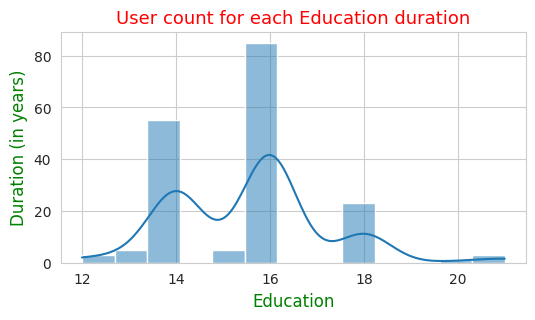

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x="Education", kde=True)
plt.xlabel('Education',  fontsize=12, color='green')
plt.ylabel('Duration (in years)', fontsize=12, color='green')
plt.title("User count for each Education duration", color='red', fontsize=13 )

plt.show()

In [ ]:
#minimum years of education

df['Education'].min()

12

In [ ]:
#maximum years of education

df['Education'].max()

21

The duration for education varies from 12 to 21 years. Majority of people have 16-18 years of education. Only a very few have 20+ years of education.

In [ ]:
#Count of marital status

df['MaritalStatus'].value_counts().sort_values(ascending=False)

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

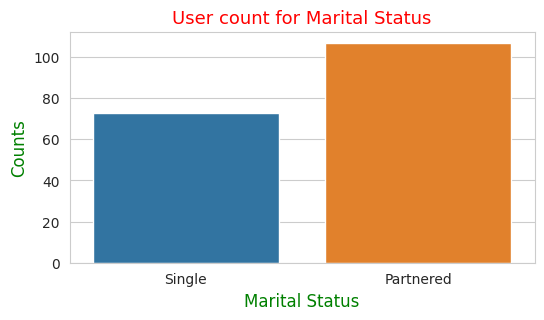

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, x="MaritalStatus")
plt.xlabel('Marital Status',  fontsize=12, color='green')
plt.ylabel('Counts', fontsize=12, color='green')
plt.title("User count for Marital Status", color='red', fontsize=13 )

plt.show()

Majority, i.e. 59.44%, of the population is Partnered

In [ ]:
df.groupby('MaritalStatus')['Usage'].value_counts()

MaritalStatus  Usage
Partnered      3        40
               4        29
               2        22
               5         9
               6         5
               7         2
Single         3        29
               4        23
               2        11
               5         8
               6         2
Name: Usage, dtype: int64

In [ ]:
df.groupby('MaritalStatus')['Fitness'].value_counts()

MaritalStatus  Fitness
Partnered      3          57
               2          18
               5          18
               4          13
               1           1
Single         3          40
               5          13
               4          11
               2           8
               1           1
Name: Fitness, dtype: int64

In [ ]:
#Count of fitness rating on a scale of 1 to 5 where 5 is excellent and 1 is in poor shape

df['Fitness'].value_counts().sort_values(ascending=False)

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

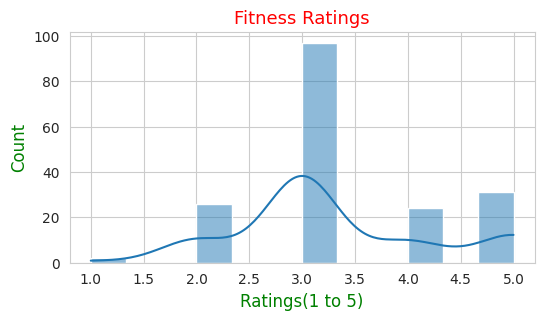

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x="Fitness", kde=True)
plt.xlabel('Ratings(1 to 5)',  fontsize=12, color='green')
plt.ylabel('Count', fontsize=12, color='green')
plt.title("Fitness Ratings", color='red', fontsize=13 )

plt.show()

Majority, i.e. 53.88%, of the population have rated themselves as 3(average) for fitness rating.

In [ ]:
#Count of weekly usage of treadmill

df['Usage'].value_counts().sort_values(ascending=False)

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

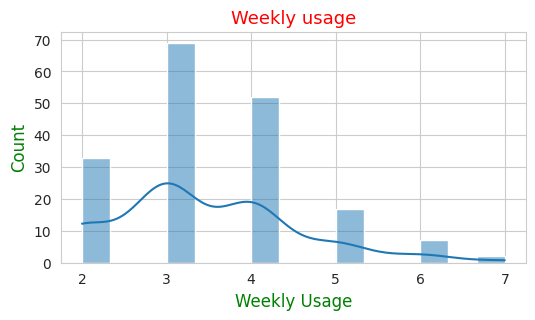

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x="Usage", kde=True)
plt.xlabel('Weekly Usage',  fontsize=12, color='green')
plt.ylabel('Count', fontsize=12, color='green')
plt.title("Weekly usage", color='red', fontsize=13 )

plt.show()

Majority, i.e. 38.33%, of the population used the treadmill 3 times per week.

In [ ]:
df.groupby('Usage')['Fitness'].value_counts()

Usage  Fitness
2      3          18
       2          14
       1           1
3      3          47
       2          10
       4          10
       1           1
       5           1
4      3          30
       5          13
       4           7
       2           2
5      5           9
       4           6
       3           2
6      5           6
       4           1
7      5           2
Name: Fitness, dtype: int64

In [ ]:
#Weekly Usage as per Gender

df.groupby('Gender')['Usage'].value_counts()

Gender  Usage
Female  3        33
        2        20
        4        14
        5         7
        6         2
Male    4        38
        3        36
        2        13
        5        10
        6         5
        7         2
Name: Usage, dtype: int64

Overall majority of people use treadmill 3-4 times a week. Comparing genders, females use mostly 2-3 times while males use 3-4 times a week.

In [ ]:
#Count of weekly Miles walked/run

df['Miles'].value_counts().sort_values(ascending=False)

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
56      6
64      6
180     6
200     6
127     5
160     5
42      4
150     4
120     3
103     3
38      3
170     3
74      3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

In [ ]:
#Minimum no. of miles run in a week

df['Miles'].min()

21

In [ ]:
#Maximum no. of miles run in a week

df['Miles'].max()

360

In [ ]:
df['Miles'].median()

94.0

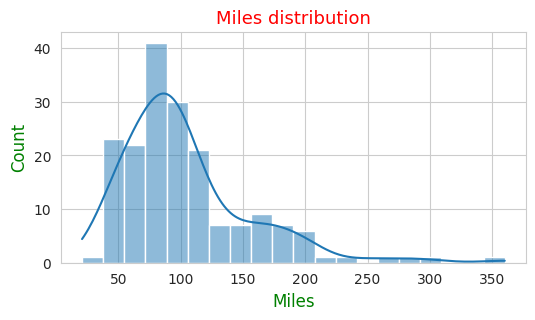

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x="Miles", kde=True)
plt.xlabel('Miles',  fontsize=12, color='green')
plt.ylabel('Count', fontsize=12, color='green')
plt.title("Miles distribution", color='red', fontsize=13 )

plt.show()

Miles range run/walk per week by a user varies from 21 to 360.

In [ ]:
#Count of Income

df['Income'].value_counts().sort_values(ascending=False)

45480     14
52302      9
46617      8
54576      8
53439      8
          ..
52290      1
85906      1
103336     1
99601      1
95508      1
Name: Income, Length: 62, dtype: int64

In [ ]:
#Minimum income

df['Income'].min()

29562

In [ ]:
#Maximum income

df['Income'].max()

104581

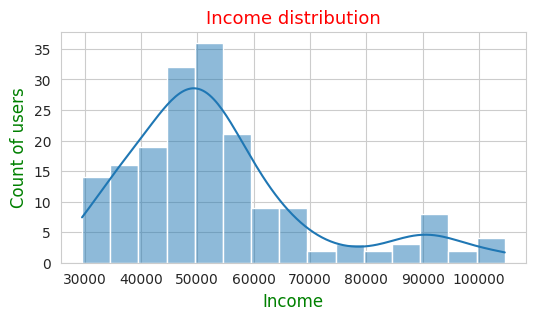

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x="Income", kde=True)
plt.xlabel('Income',  fontsize=12, color='green')
plt.ylabel('Count of users', fontsize=12, color='green')
plt.title("Income distribution", color='red', fontsize=13 )

plt.show()



Majority of people are in the income range 35000 to 60000.

Income range varies from 29562 to 104581.

# Outliers Detection

---



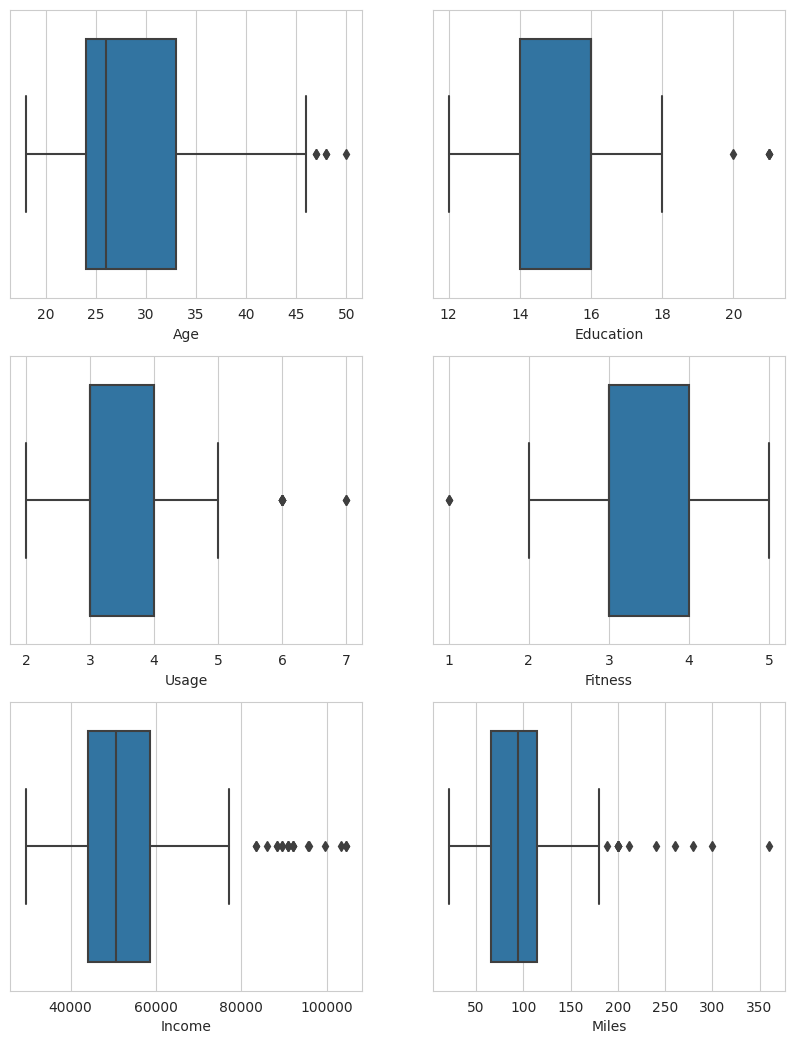

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10, 9))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

Miles and Income have the highest number of potential outliers while fitness has the lowest.

# Bi-variate Analysis

---



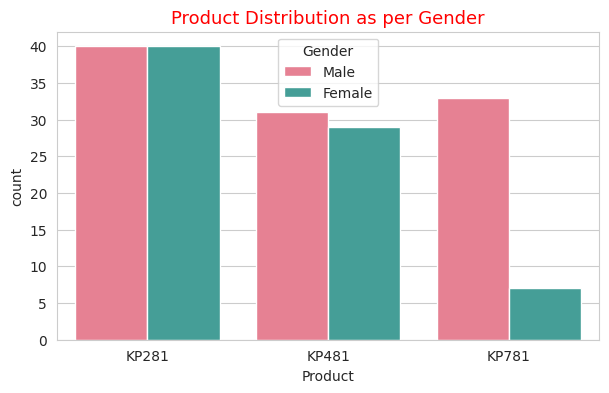

In [ ]:
#Effect of Gender on Product distribution

sns.set_style(style='whitegrid')
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Product', hue='Gender', palette='husl')
plt.title("Product Distribution as per Gender",fontsize=13, color='red')
plt.show()



1.   The ratio for males and females is same for KP281
2.   KP481 has some difference in gender with males being the top users
3.   KP781 shows significantly higher number of male users compared to females



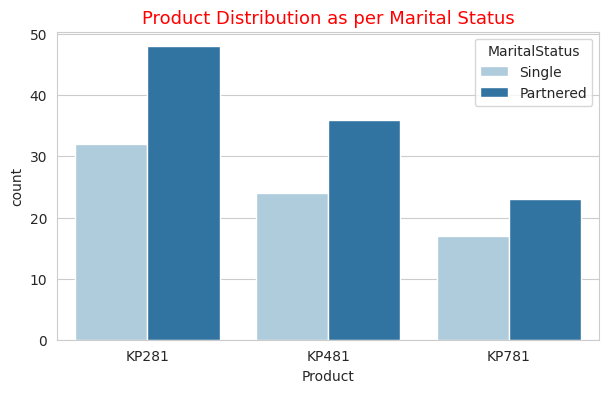

In [ ]:
#Effect of Marital status on Product distribution

sns.set_style(style='whitegrid')
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Product', hue='MaritalStatus', palette='Paired')
plt.title("Product Distribution as per Marital Status",fontsize=13, color='red')
plt.show()

1. The proportion on partnered users is higher for all products

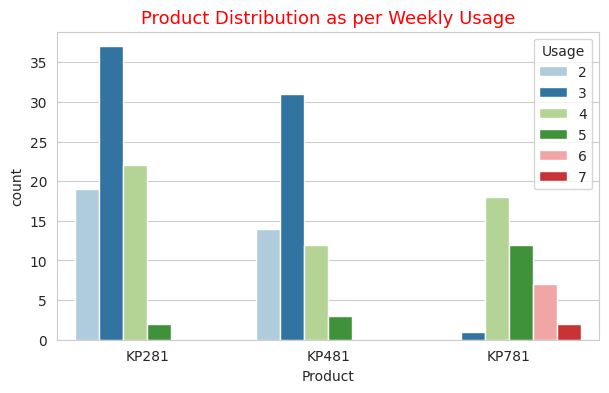

In [ ]:
#Effect of Weekly Usage on Product distribution

sns.set_style(style='whitegrid')
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Product', hue='Usage', palette='Paired')
plt.title("Product Distribution as per Weekly Usage", fontsize=13, color='red')
plt.show()

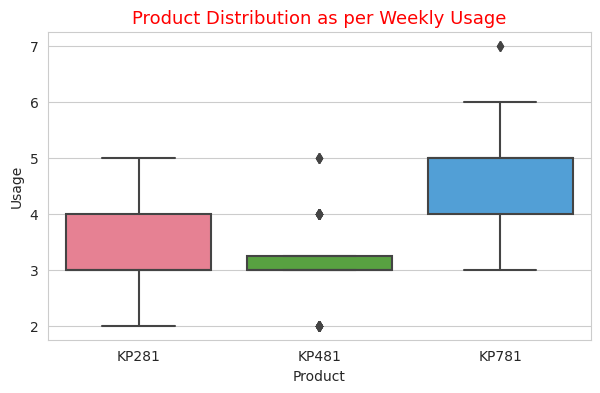

In [ ]:
#boxplot for effect of Weekly Usage on Product Distribution

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Product', y='Usage', palette='husl')
plt.title("Product Distribution as per Weekly Usage", fontsize=13, color='red')
plt.show()

1. KP281 and KP481 are used by maximum users 3 times per week
2. KP781 is used more than 4 times a week by majority. People who are fitness enthusiasts are more likely to buy KP781.

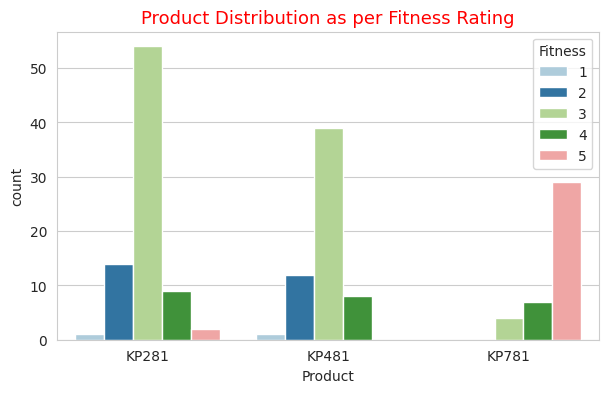

In [ ]:
#Effect of Fitness Rating on Product distribution

sns.set_style(style='whitegrid')
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Product', hue='Fitness', palette='Paired')
plt.title("Product Distribution as per Fitness Rating", fontsize=13, color='red')
plt.show()

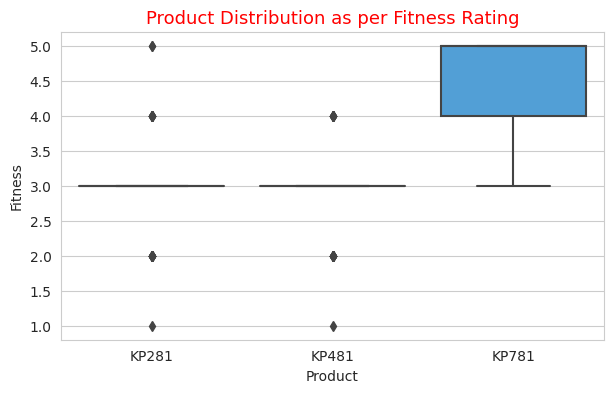

In [ ]:
#boxplot for effect of Fitness Rating on Product Distribution

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Product', y='Fitness', palette='husl')
plt.title("Product Distribution as per Fitness Rating", fontsize=13, color='red')
plt.show()


1. As inferred earlier, people with higher fitness rating, i.e. mor than average(3) are more likely to buy KP781
2. People with average or below average fitness rating are more likely to use KP281 or KP481



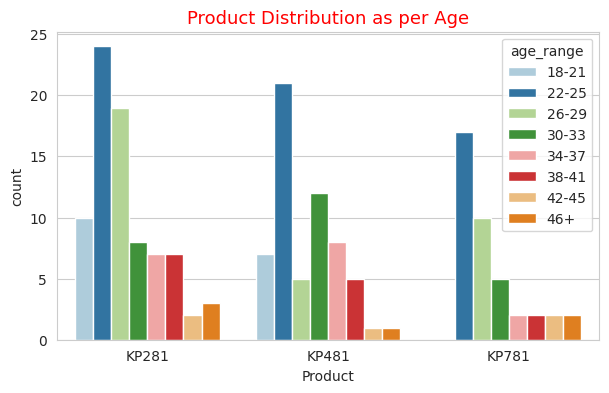

In [ ]:
#Effect of Age on Product distribution

sns.set_style(style='whitegrid')
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Product', hue='age_range', palette='Paired')
plt.title("Product Distribution as per Age", fontsize=13, color='red')
plt.show()

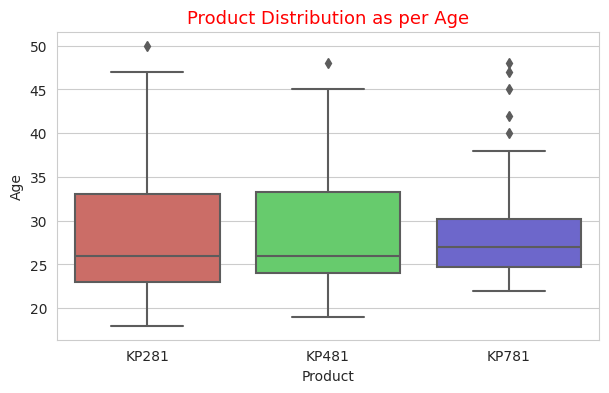

In [ ]:
#boxplot for effect of Age on Product Distribution

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Product', y='Age', palette='hls')
plt.title("Product Distribution as per Age", fontsize=13, color='red')
plt.show()

1. 22-25 age range has the maximum proportion of users for all product types.
2. Median age for KP781 users ig higher than other variants
3. KP781 seems to have more potential outliers based on Age..

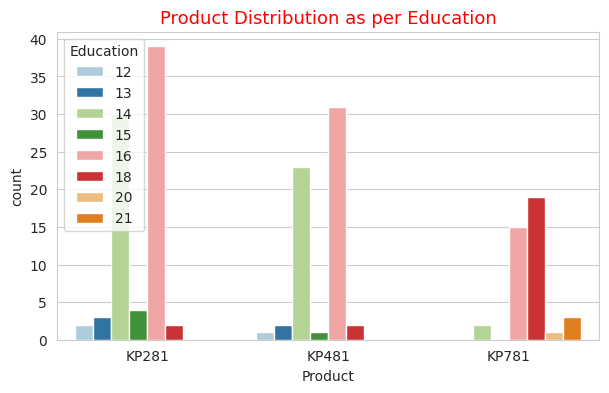

In [ ]:
#Effect of Education on Product distribution

sns.set_style(style='whitegrid')
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Product', hue='Education', palette='Paired')
plt.title("Product Distribution as per Education", fontsize=13, color='red')
plt.show()

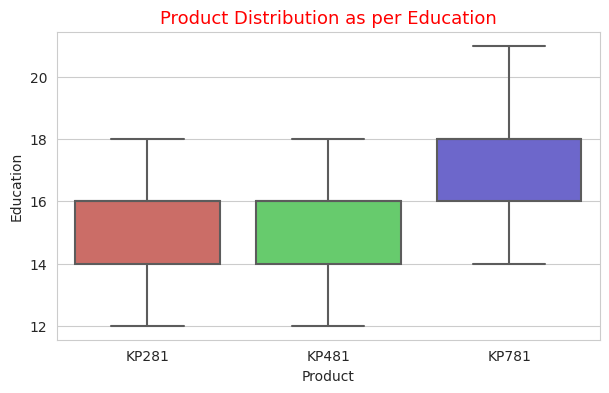

In [ ]:
#boxplot for effect of Education on Product distribution

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Product', y='Education', palette='hls')
plt.title("Product Distribution as per Education", fontsize=13, color='red')
plt.show()

1. Majorly users with 16 to 18 years of education are likely to buy KP781
2. Majorly users with 14 to 16 years of education are likely to buy KP281 and KP481

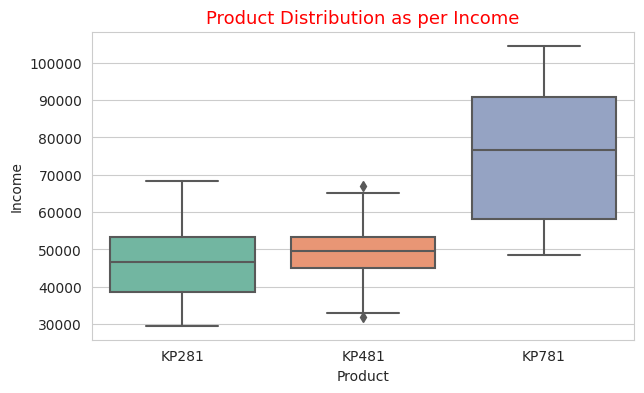

In [ ]:
#boxplot for effect of Income on Product Distribution

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Product', y='Income', palette='Set2')
plt.title("Product Distribution as per Income", fontsize=13, color='red')
plt.show()

1. Median Income for KP781 users is much higher compared to other variants.
2. KP281 has the lowest price among all variants and also has users with lowest median income compared among all three product followed by KP481 and KP781.
3. Higher the income range higher the chances of buying a more expensive product.

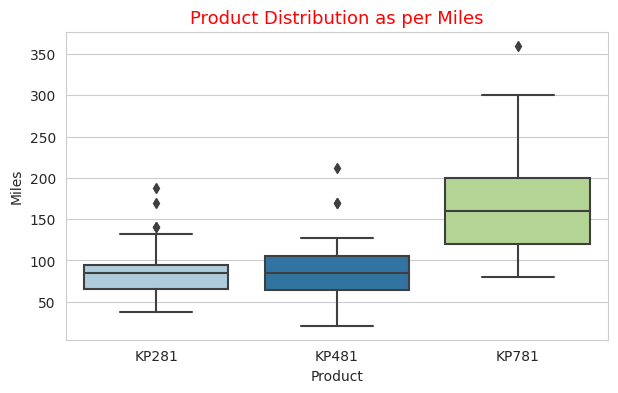

In [ ]:
#boxplot for effect of Miles on Product Distribution

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Product', y='Miles', palette='Paired')
plt.title("Product Distribution as per Miles", fontsize=13, color='red')
plt.show()

1. KP281 seems to have more potential outliers based on miles run/walked per week.
2. Median miles are the highest for KP781 as we have already inferred that people with higher fitness rating and higher weekly usage buy KP781.
3. Median miles are same for KP281 and KP481.


# Multi-variate Analysis

---



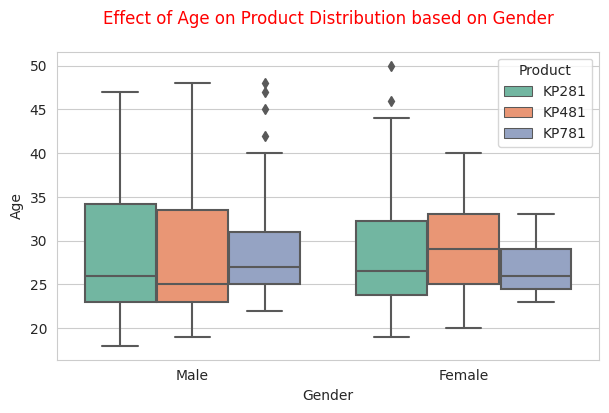

In [ ]:
#Effect of Age on Product distribution for Males & Females

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Gender', y='Age', hue='Product', palette='Set2')
plt.title("Effect of Age on Product Distribution based on Gender", pad=20, fontsize=12, color='red')
plt.show()

1. Proportion of both male and female users are the highest for KP281.
2. The median age for Males buying KP481 and females buying KP781 is the lowest.
3. The median age for Males buying KP781 and females buying KP481 is the highest.



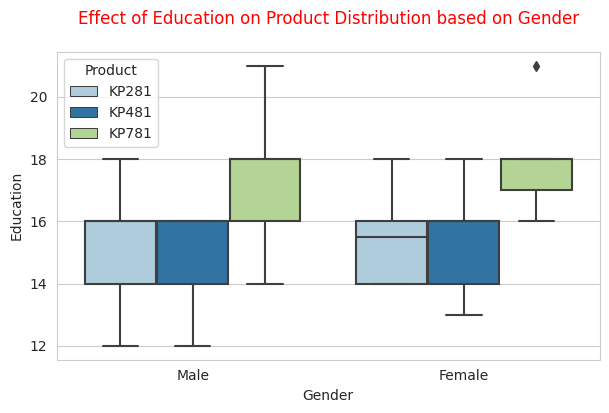

In [ ]:
#Effect of Education on Product distribution for Males & Females

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Gender', y='Education', hue='Product', palette='Paired')
plt.title("Effect of Education on Product Distribution based on Gender", pad=20, fontsize=12, color='red')
plt.show()

1. Majority of both male and female users for KP481 and KP281 fall in the education duration of 14 to 16 years.
2. Both Males and Females with education less than 16 years are likely to buy KP281 or KP481 and the ones with education more than 16 years will buy KP781.

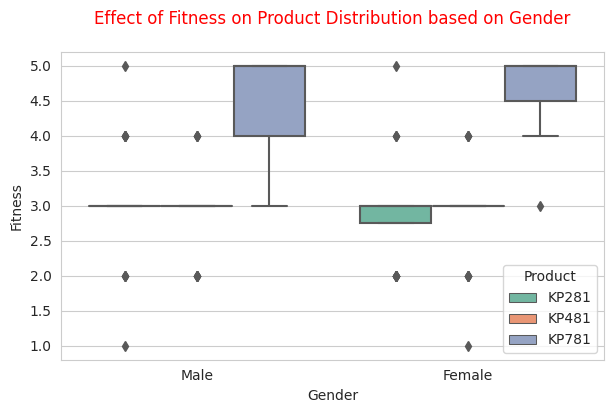

In [ ]:
#Effect of Fitness rating on Product distribution for Males & Females

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Gender', y='Fitness', hue='Product', palette='Set2')
plt.title("Effect of Fitness on Product Distribution based on Gender", pad=20, fontsize=12, color='red')
plt.show()

1. KP781 is likely to be bought by males with fitness rating >=4 and females with fitness rating >=4.5.
2. We can infer that a fitness enthusiast with higher fitness rating is likely to buy the best model of treadmill available, i.e. KP781.

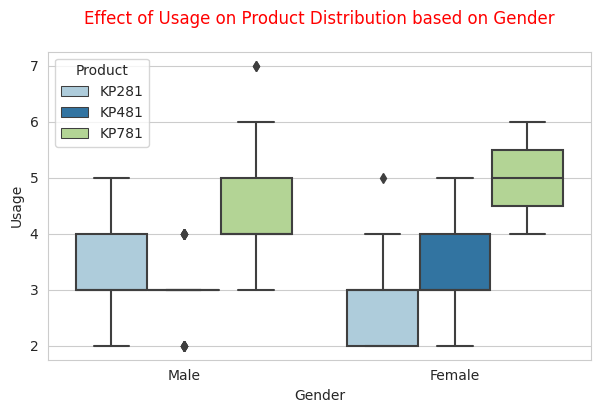

In [ ]:
#Effect of Weekly Usage on Product distribution for Males & Females

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Gender', y='Usage', hue='Product', palette='Paired')
plt.title("Effect of Usage on Product Distribution based on Gender", pad=20, fontsize=12, color='red')
plt.show()

1. Median weekly usage for both genders is the highest for KP781. Males and females with 4 or more times weekly usage are likely to buy KP781.
2. Both genders have the lowest weekly usage for KP281.
3. We can infer that depending on the number of times a person uses the treadmill, higher the usage, higher are the chances of buying a better version of treadmill.

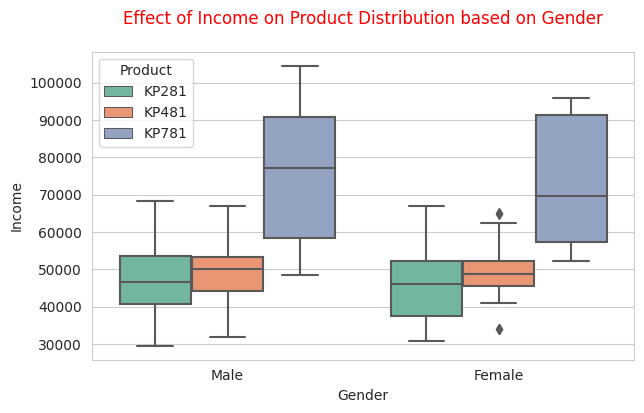

In [ ]:
#Effect of Income on Product distribution for Males & Females

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Gender', y='Income', hue='Product', palette='Set2')
plt.title("Effect of Income on Product Distribution based on Gender", pad=20, fontsize=12, color='red')
plt.show()

1. Given the price for KP781 is the highest amont all products, people with higher income range are likely to buy that model.
2. People in the lowest income ranges prefer to buy KP281.

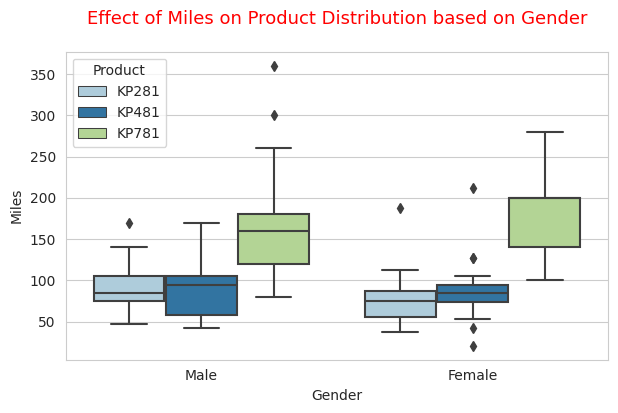

In [ ]:
#Effect of Miles on Product distribution for Males & Females

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Gender', y='Miles', hue='Product', palette='Paired')
plt.title("Effect of Miles on Product Distribution based on Gender", pad=20, fontsize=13, color='red')
plt.show()

# Correlation using Scatterplot

---



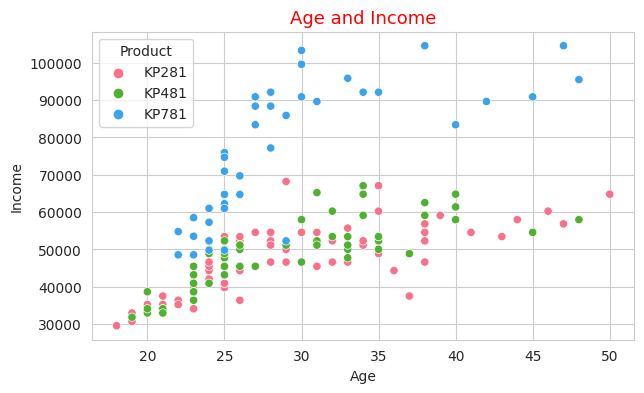

In [ ]:
#scatterplot for Age and Income

plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x='Age', y='Income', hue='Product', palette='husl')
plt.title("Age and Income", fontsize=13, color='red')
plt.show()

Through the above scatterplot, we can easily infer that age and income are positively correlated. With an increase in Age, the income range for each product user also increases.

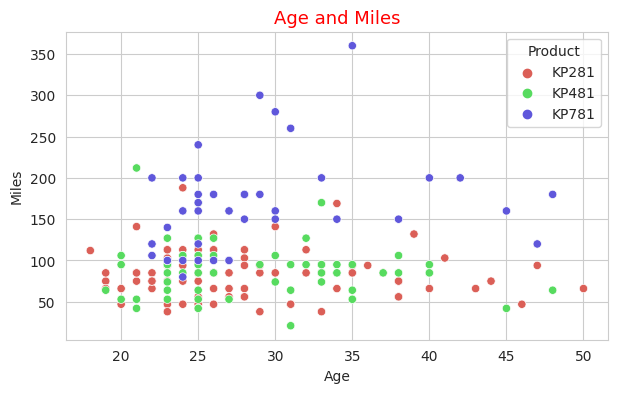

In [ ]:
#scatterplot for Age and Miles

plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x='Age', y='Miles', hue='Product', palette='hls')
plt.title("Age and Miles", fontsize=13, color='red')
plt.show()

Through the above scatterplot, we can easily infer that apart from KP781, the maximum proportion of users among different age groups cover less than 150 miles weekly.

# Cross-tab, Heat-maps and Pair-plot

---



In [ ]:
#proportion of each product based on overall population

np.round(df['Product'].value_counts(normalize=True),2)

KP281    0.44
KP481    0.33
KP781    0.22
Name: Product, dtype: float64

KP281 has the highest number of buyers while KP781 has the lowest. This can be because of the affordability of different product types.

In [ ]:
#Proportion of age_range based on each product type

age=np.round(pd.crosstab(df['age_range'], df['Product'], normalize='index'),2)
age

Product,KP281,KP481,KP781
age_range,,,
18-21,0.59,0.41,0.00
22-25,0.39,0.34,0.27
26-29,0.56,0.15,0.29
30-33,0.32,0.48,0.20
34-37,0.41,0.47,0.12
38-41,0.50,0.36,0.14
42-45,0.40,0.20,0.40
46+,0.50,0.17,0.33


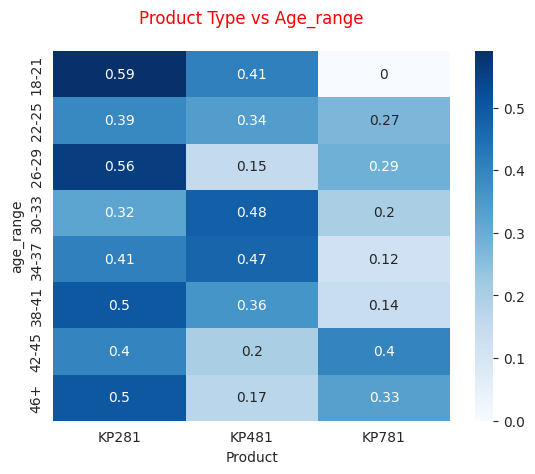

In [ ]:
sns.heatmap(age, annot=True, cmap='Blues')
plt.title('Product Type vs Age_range', color='red', fontsize=12, pad=20)
plt.show()

1. The above heatmap represents that for each age group which product type has the highest chances to be bought. Darker the shade, higher the probability.

2. Like for 18-21, probability of buying KP281 is the highest at 0.59 and buying KP781 is the lowest as we have no user below 21 who has bought KP781 in the past.

In [ ]:
#Proportion of Gender based on each product type

gen=np.round(pd.crosstab(df['Gender'], df['Product'], normalize='index'),2)
gen

Product,KP281,KP481,KP781
Gender,,,
Female,0.53,0.38,0.09
Male,0.38,0.30,0.32


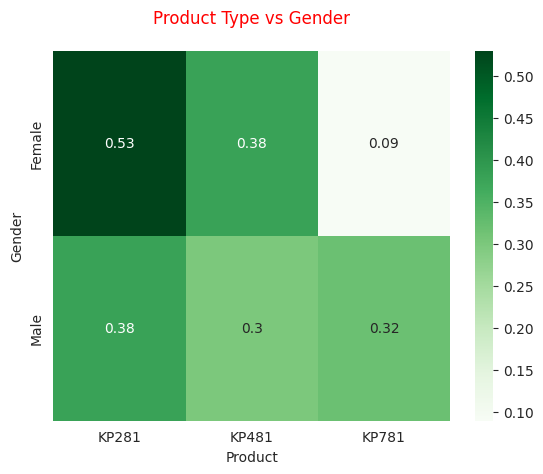

In [ ]:
sns.heatmap(gen, annot=True, cmap='Greens')
plt.title('Product Type vs Gender', color='red', fontsize=12, pad=20)
plt.show()

1. The above heatmap shows that majority of females and males buy KP281.

2. Least preferred product is KP481 for Males and KP781 for females.

In [ ]:
#Proportion of Education duration based on each product type

ed=np.round(pd.crosstab(df['Education'], df['Product'], normalize='index'),2)
ed

Product,KP281,KP481,KP781
Education,,,
12,0.67,0.33,0.00
13,0.60,0.40,0.00
14,0.55,0.42,0.04
15,0.80,0.20,0.00
16,0.46,0.36,0.18
18,0.09,0.09,0.83
20,0.00,0.00,1.00
21,0.00,0.00,1.00


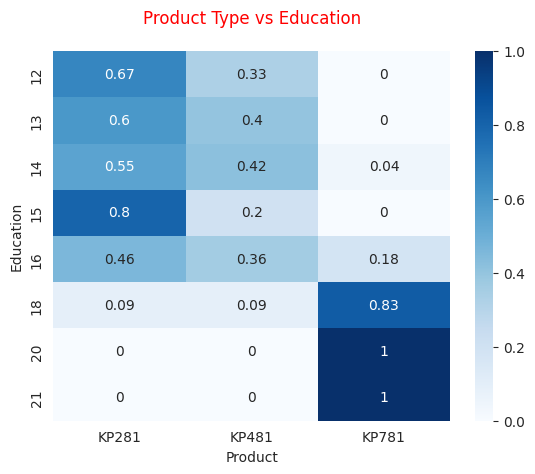

In [ ]:
sns.heatmap(ed, annot=True, cmap='Blues')
plt.title('Product Type vs Education', color='red', fontsize=12, pad=20)
plt.show()

1. Heatmap shows that people having 20 or more years of education buy only KP781. Only a very few having education less than 18 years buy KP781.
2. KP281 users have mainly education duration of 14 to 16 years.


In [ ]:
#Proportion of weekly usage count based on each product type

us=np.round(pd.crosstab(df['Usage'], df['Product'], normalize='index'),2)
us

Product,KP281,KP481,KP781
Usage,,,
2,0.58,0.42,0.00
3,0.54,0.45,0.01
4,0.42,0.23,0.35
5,0.12,0.18,0.71
6,0.00,0.00,1.00
7,0.00,0.00,1.00


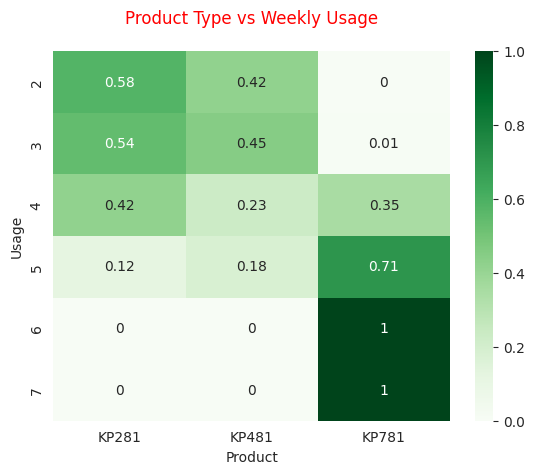

In [ ]:
sns.heatmap(us, annot=True, cmap='Greens')
plt.title('Product Type vs Weekly Usage', color='red', fontsize=12, pad=20)
plt.show()

1. Heatmap shows that people using the treadmill 6 or more years of education buy only KP781. Only a very few having usage less than 4 times buy KP781.
2. KP281 and KP481 is mainly bought by people with weekly usage less than 3.


In [ ]:
#Proportion of Fitness rating based on each product type

ft=np.round(pd.crosstab(df['Fitness'], df['Product'], normalize='index'),2)
ft

Product,KP281,KP481,KP781
Fitness,,,
1,0.50,0.50,0.00
2,0.54,0.46,0.00
3,0.56,0.40,0.04
4,0.38,0.33,0.29
5,0.06,0.00,0.94


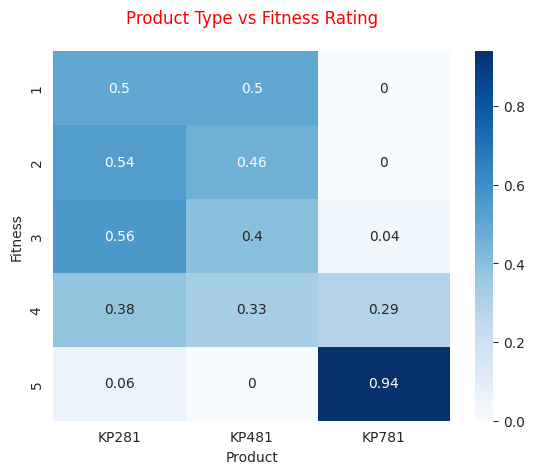

In [ ]:
sns.heatmap(ft, annot=True, cmap='Blues')
plt.title('Product Type vs Fitness Rating', color='red', fontsize=12, pad=20)
plt.show()

1. Heatmap shows that mainly people having 4 or more Fitness rating buy KP781.
2. KP281 and KP481 is mainly bought by people with Fitness rating less than 4.


In [ ]:
#Proportion of Marital status based for each product type

ht=np.round(pd.crosstab(df['MaritalStatus'], df['Product'], normalize='index'),2)
ht

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.45,0.34,0.21
Single,0.44,0.33,0.23


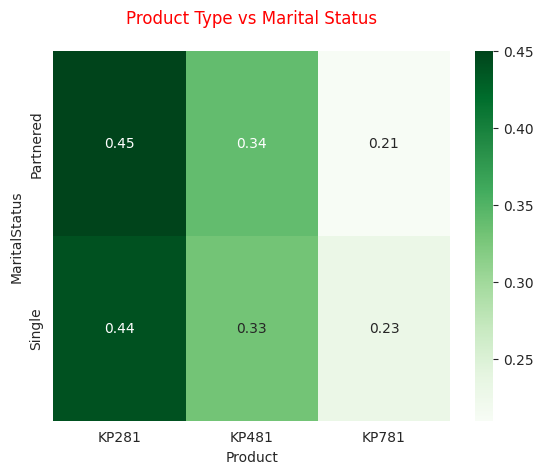

In [ ]:
sns.heatmap(ht, annot=True, cmap='Greens')
plt.title('Product Type vs Marital Status', color='red', fontsize=12, pad=20)
plt.show()

1. Heatmap shows that both single and partnered people prefer KP281.


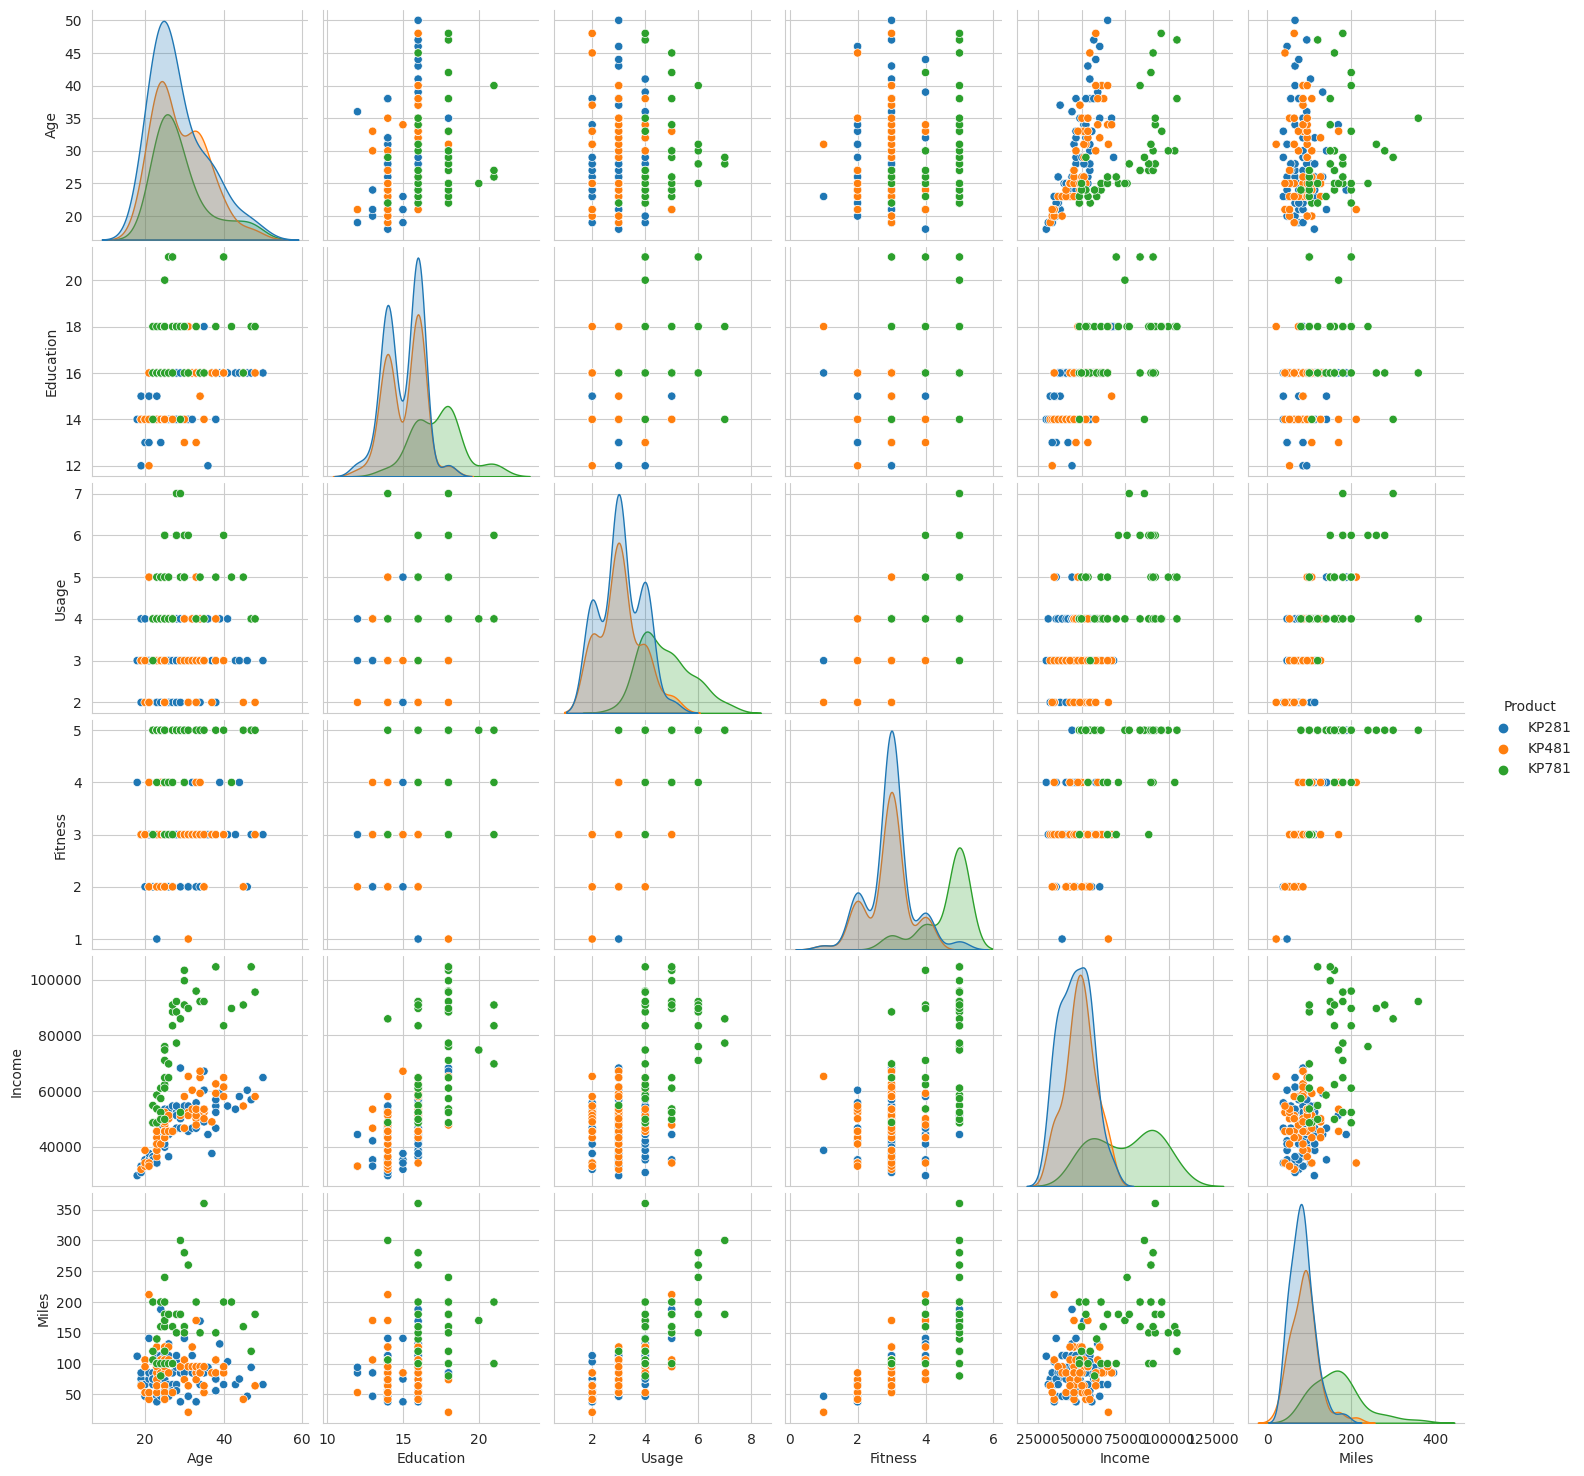

In [ ]:
#Pairplot differentiated on Products

sns.pairplot(df, hue ='Product')
plt.show()

# Probability

---



### *Probability of buying a product when Gender is Female*




In [ ]:
# P(KP781|Female)

p_KP781_Female = np.round(len(df[(df['Gender'] == 'Female') & (df['Product'] == 'KP781')]) / len(df[df['Gender'] == 'Female']),2)
print('P(KP781|Female) : ',p_KP781_Female)

# P(KP481|Female)

p_KP481_Female = np.round(len(df[(df['Gender'] == 'Female') & (df['Product'] == 'KP481')]) / len(df[df['Gender'] == 'Female']),2)
print('P(KP481|Female) : ',p_KP481_Female)

# P(KP281|Female)

p_KP281_Female = np.round(len(df[(df['Gender'] == 'Female') & (df['Product'] == 'KP281')]) / len(df[df['Gender'] == 'Female']),2)
print('P(KP281|Female) : ',p_KP281_Female)

P(KP781|Female) :  0.09
P(KP481|Female) :  0.38
P(KP281|Female) :  0.53


For Females, the probability of buying KP281 is the highest while KP781 being the lowest.

---



### *Probability of buying a product when Gender is Male*





In [ ]:
# P(KP781|Male)

p_KP781_Male = np.round(len(df[(df['Gender'] == 'Male') & (df['Product'] == 'KP781')]) / len(df[df['Gender'] == 'Male']),2)
print('P(KP781|Male) : ',p_KP781_Male)

# P(KP481|Male)

p_KP481_Male = np.round(len(df[(df['Gender'] == 'Male') & (df['Product'] == 'KP481')]) / len(df[df['Gender'] == 'Male']),2)
print('P(KP481|Male) : ',p_KP481_Male)

# P(KP281|Male)

p_KP281_Male = np.round(len(df[(df['Gender'] == 'Male') & (df['Product'] == 'KP281')]) / len(df[df['Gender'] == 'Male']),2)
print('P(KP281|Male) : ',p_KP281_Male)


P(KP781|Male) :  0.32
P(KP481|Male) :  0.3
P(KP281|Male) :  0.38


For Males also, the probability of buying KP281 is the highest but KP481 is the lowest.

---



### *Probability of buying a product when Marital Status is Partnered*




In [ ]:
# P(KP781|Partnered)
p_KP781_Partnered = np.round(len(df[(df['MaritalStatus'] == 'Partnered') & (df['Product'] == 'KP781')])
                                                                        / len(df[df['MaritalStatus'] == 'Partnered']),2)

print('P(KP781|Partnered) : ',p_KP781_Partnered)



# P(KP481|Partnered)
p_KP481_Partnered = np.round(len(df[(df['MaritalStatus'] == 'Partnered') & (df['Product'] == 'KP481')])
                                                                      / len(df[df['MaritalStatus'] == 'Partnered']),2)

print('P(KP481|Partnered) : ',p_KP481_Partnered)



# P(KP281|Partnered)
p_KP281_Partnered = np.round(len(df[(df['MaritalStatus'] == 'Partnered') & (df['Product'] == 'KP281')])
                                                                      / len(df[df['MaritalStatus'] == 'Partnered']),2)

print('P(KP281|Partnered) : ',p_KP281_Partnered)

P(KP781|Partnered) :  0.21
P(KP481|Partnered) :  0.34
P(KP281|Partnered) :  0.45


For Partnered people, the probability of buying KP281 is the highest and KP781 is the lowest.

---



### *Probability of buying a product when Marital Status is Single*



In [ ]:
# P(KP781|Single)
p_KP781_Single = np.round(len(df[(df['MaritalStatus'] == 'Single') & (df['Product'] == 'KP781')])
                                                                        / len(df[df['MaritalStatus'] == 'Single']),2)
print('P(KP781|Single) : ', p_KP781_Single)



# P(KP481|Single)
p_KP481_Single = np.round(len(df[(df['MaritalStatus'] == 'Single') & (df['Product'] == 'KP481')])
                                                                      / len(df[df['MaritalStatus'] == 'Single']),2)
print('P(KP481|Single) : ', p_KP481_Single)



# P(KP281|Single)
p_KP281_Single = np.round(len(df[(df['MaritalStatus'] == 'Single') & (df['Product'] == 'KP281')])
                                                                      / len(df[df['MaritalStatus'] == 'Single']),2)
print('P(KP281|Single) : ', p_KP281_Single)

P(KP781|Single) :  0.23
P(KP481|Single) :  0.33
P(KP281|Single) :  0.44


For Single people also, the probability of buying KP281 is the highest and KP781 is the lowest.

---



## Customer Profiling and Recommendations

1. Females prefer buying KP281 compared to other models while males prefer either P281 or KP781.
2. People using the treadmill 3 or less times prefer KP281 or KP481. People with weekly usage of more than 3 times prefer KP781.
3. People with fitness rating of 3 or less prefer KP281 or KP481 while those with 4 or more prefer KP781.
4. No person below 21 age prefers buying KP781. They go for either KP281 or KP481.
5. People with 16 years or less duration of education prefer KP281 or KP481 while the rest prefer KP781.
6. Those with 100 miles or less covered weekly prefer KP281 or KP481 while the rest prefer KP781.
7. Those with Income less than 55k prefer KP281 or KP481 while those with more than 55k prefer KP781.


